In [35]:
pip install fbprophet

import data, used in round 1 and round 2

In [41]:

import pandas as pd
import numpy as np
from fbprophet import Prophet
from datetime import datetime


base_line_date = "04-12-2020"
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
state_to_idx_dict = {}
for idx, state in enumerate(states):
  state_to_idx_dict[state] = idx

def pre_process(data):
     # Drop ID column as it's not helpful in our prediction.
    first_column = data.columns[0]
    data = data.drop([first_column], axis=1)
    data = data.values

    # Change state name to corresponding state indices.
    # Change date to difference from baseline date.
    for i in range(data.shape[0]):
        data[i][0] = state_to_idx_dict[data[i][0]]
        data[i][1] = data[i][1]
    confirmed = data[:,2]
    death = data[:,3]
    #data = np.delete(data, 2, 1)
    #data = np.delete(data, 2, 1)

    return data, confirmed, death

def main():
    data = pd.read_csv("data/train_round2.csv")
    '''
    round 1:
    data = pd.read_csv("data/train.csv")'''
    data, confirmed, death = pre_process(data)
    return data, confirmed, death


average ( used in round 1; used after this model generated a result)

In [19]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from datetime import datetime




def pre_process(data):
     # Drop ID column as it's not helpful in our prediction.
    first_column = data.columns[0]
    data = data.drop([first_column], axis=1)
    data = data.values

    # Change state name to corresponding state indices.
    # Change date to difference from baseline date.
    for i in range(data.shape[0]):
        data[i][0] = state_to_idx_dict[data[i][0]]
        data[i][1] = data[i][1]
    confirmed = data[:,2]
    death = data[:,3]
    #data = np.delete(data, 2, 1)
    #data = np.delete(data, 2, 1)

    return data, confirmed, death


    #data = pandas.read_csv("data/train_round2.csv")
data = pd.read_csv("data/Team15.dms")
data2 = pd.read_csv("data/team15-5.csv")
data = data.values
data2 = data2.values
for i in range(650,1300):
  if (abs(data[i][1]-data2[i][1])/(data[i][1])) < 0.03:
    data[i][1]=(data[i][1]+data2[i][1])/2
  if (abs(data[i][2]-data2[i][2])/(data[i][2])) < 0.03:
    data[i][2]=(data[i][2]+data2[i][2])/2

result = pd.DataFrame({'ForecastID':range(1300),'Confirmed': data[:,1], 'Deaths': data[:,2]},index=range(1300))
result.to_csv('team15-6.csv',index=False) 



train, used in round 1 and round 2, basically the same.Only changed the length of the array

In [42]:
data, confirmed, death=main()
print(data[0:10])

[[0 '04-12-2020' 3563 93 nan 3470.0 75.98802021 21583.0 437.0 2.610159978
  460.3001516 12.26494527]
 [1 '04-12-2020' 272 8 66.0 264.0 45.50404936 8038.0 31.0
  2.9411764710000003 1344.711576 11.39705882]
 [2 '04-12-2020' 3542 115 nan 3427.0 48.66242224 42109.0 nan 3.246753247
  578.5222863 nan]
 [3 '04-12-2020' 1280 27 367.0 1253.0 49.43942261 19722.0 130.0 2.109375
  761.7533537 10.15625]
 [4 '04-12-2020' 22795 640 nan 22155.0 58.13772584 190328.0 5234.0
  2.81202018 485.4238685 22.9611757]
 [5 '04-12-2020' 7307 289 nan 7018.0 128.943729 34873.0 1376.0
  3.955111537 615.3899908 18.8312577]
 [6 '04-12-2020' 12035 554 nan 11481.0 337.5604825000001 41220.0 1654.0
  4.6032405480000005 1156.148159 13.74324886]
 [7 '04-12-2020' 1625 35 191.0 1590.0 166.8782169 11103.0 190.0
  2.153846154 1140.214672 11.69230769]
 [8 '04-12-2020' 19895 461 nan 19434.0 93.70022691 182753.0 2772.0
  2.317165117 860.7186513 13.93314903]
 [9 '04-12-2020' 12452 433 nan 12019.0 122.8081405 54453.0 2505.0
  3.4773

In [43]:
import itertools
import numpy as np
import pandas as pd
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

def train_confirm(state):

  # Generate all combinations of parameters
  '''all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  mapes = []  # Store the RMSEs for each params here


# Use cross validation to evaluate all parameters
  cutoffs = pd.to_datetime(['2020-07-31'])
  for params in all_params:
    m = Prophet(**params).fit(dataset)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days')
    df_p = performance_metrics(df_cv)
    mapes.append(df_p['mape'].values[0])
  
  best_params = all_params[np.argmin(mapes)]

  m = Prophet(growth='linear',**best_params)'''
  data0=data[data[:,0] == state]
  data0t = np.delete(data0, [0,3,4,5,6,7,8,9,10,11,12], 1)
  dataset = pd.DataFrame({'ds': data0t[:, 0], 'y': data0t[:, 1]})
  m=Prophet(growth='linear')
  m.add_country_holidays('US')
  m.fit(dataset)
  future = m.make_future_dataframe(periods=21)
  #print(future.tail())
  forecast = m.predict(future)
  '''round1:
  #forecast[['ds', 'yhat']].tail(26)
  #predict=np.asarray(forecast[[ 'yhat']])[142:168] #index of pd dataset start from 0'''
  forecast[['ds', 'yhat']].tail(7) #with us holiday 9/26:4902vs7857 9/10:2067 vs 4782 9/1:556 vs150
  predict=np.asarray(forecast[[ 'yhat']])[239:246] #index of pd dataset start from 0

  return predict
  

In [44]:
def train_death(state):
  data0=data[data[:,0] == state]
  data0t = np.delete(data0, [0,2,4,5,6,7,8,9,10,11,12], 1)
  dataset = pd.DataFrame({'ds': data0t[:, 0], 'y': data0t[:, 1]})
  '''param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  mapes = []  # Store the RMSEs for each params here


# Use cross validation to evaluate all parameters
  cutoffs = pd.to_datetime(['2020-07-31'])
  for params in all_params:
    m = Prophet(**params).fit(dataset)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days')
    df_p = performance_metrics(df_cv)
    mapes.append(df_p['mape'].values[0])
  
  best_params = all_params[np.argmin(mapes)]

  m = Prophet(growth='linear',**best_params)'''
  m= Prophet(growth='linear')
  m.add_country_holidays('US')
  m.fit(dataset)
  future = m.make_future_dataframe(periods=21)
  #print(future.tail())
  forecast = m.predict(future)
  '''round1:
  #forecast[['ds', 'yhat']].tail(26)
  #predict=np.asarray(forecast[[ 'yhat']])[142:168] #index of pd dataset start from 0'''
  forecast[['ds', 'yhat']].tail(7) #with us holiday 9/26:4902vs7857 9/10:2067 vs 4782 9/1:556 vs150
  predict=np.asarray(forecast[[ 'yhat']])[239:246]
  return predict

In [ ]:
result_case=np.zeros(350)
result_death=np.zeros(350)
for i in range (50):
  prd_case=train_confirm(i)
  prd_death=train_death(i)
  for k in range (7):
    result_case[k*50+i]=prd_case[k]
    result_death[k*50+i]=prd_death[k]
'''
round1:
result_case=np.zeros(1300)
result_death=np.zeros(1300)
for i in range (50):
  prd_case=train_confirm(i)
  prd_death=train_death(i)
  for k in range (26):
    result_case[k*50+i]=prd_case[k]
    result_death[k*50+i]=prd_death[k]

'''


In [48]:

result = pd.DataFrame({'ForecastID':range(350),'Confirmed': result_case, 'Deaths': result_death},index=range(350))
result.to_csv('team15-round2.csv',index=False)
'''round 1:

result = pd.DataFrame({'ForecastID':range(1300),'Confirmed': result_case, 'Deaths': result_death},index=range(1300))
result.to_csv('team15-5.csv',index=False)'''

tune, only tuned in round 1, the result was not good

In [ ]:
data0=data[data[:,0] == 0]
data0t = np.delete(data0, [0,3,4,5,6,7,8,9,10,11,12], 1)
dataset = pd.DataFrame({'ds': data0t[:, 0], 'y': data0t[:, 1]})
dataset.head(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.



ds     y
0   04-12-2020  3563
1   04-13-2020  3734
2   04-14-2020  3953
3   04-15-2020  4075
4   04-16-2020  4345
5   04-17-2020  4571
6   04-18-2020  4712
7   04-19-2020  4888
8   04-20-2020  5079
9   04-21-2020  5317
10  04-22-2020  5593
11  04-23-2020  5832
12  04-24-2020  6026
13  04-25-2020  6026
14  04-26-2020  6421

In [ ]:
import itertools
import numpy as np
import pandas as pd
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []  # Store the RMSEs for each params here

data0=data[data[:,0] == 0]
data0t = np.delete(data0, [0,3,4,5,6,7,8,9,10,11,12], 1)
dataset = pd.DataFrame({'ds': data0t[:, 0], 'y': data0t[:, 1]})
#m = Prophet(growth='linear')
#m.add_country_holidays('US')
#m.fit(dataset)
#future = m.make_future_dataframe(periods=26)
  #print(future.tail())
#forecast = m.predict(future)
  #forecast[['ds', 'yhat']].tail()
#forecast[['ds', 'yhat']].tail(26) #with us holiday 9/26:4902vs7857 9/10:2067 vs 4782 9/1:556 vs150
#predict=np.asarray(forecast[[ 'yhat']])[142:168] #index of pd dataset start from 0

# Use cross validation to evaluate all parameters
cutoffs = pd.to_datetime(['2020-07-31'])
for params in all_params:
    m = Prophet(**params).fit(dataset)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days')
    df_p = performance_metrics(df_cv)
    mapes.append(df_p['mape'].values[0])



In [ ]:
# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
print(tuning_results)
best_params = all_params[np.argmin(mapes)]
print(best_params)

    changepoint_prior_scale  seasonality_prior_scale      mape
0                     0.001                     0.01  0.126257
1                     0.001                     0.10  0.124555
2                     0.001                     1.00  0.125988
3                     0.001                    10.00  0.126585
4                     0.010                     0.01  0.020440
5                     0.010                     0.10  0.021946
6                     0.010                     1.00  0.020534
7                     0.010                    10.00  0.017039
8                     0.100                     0.01  0.002830
9                     0.100                     0.10  0.002853
10                    0.100                     1.00  0.002843
11                    0.100                    10.00  0.002799
12                    0.500                     0.01  0.003292
13                    0.500                     0.10  0.003303
14                    0.500                     1.00  0

tune death

In [ ]:

import itertools
import numpy as np
import pandas as pd
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []  # Store the RMSEs for each params here

data0=data[data[:,0] == 0]
data0t = np.delete(data0, [0,2,4,5,6,7,8,9,10,11,12], 1)
dataset = pd.DataFrame({'ds': data0t[:, 0], 'y': data0t[:, 1]})
#m = Prophet(growth='linear')
#m.add_country_holidays('US')
#m.fit(dataset)
#future = m.make_future_dataframe(periods=26)
  #print(future.tail())
#forecast = m.predict(future)
  #forecast[['ds', 'yhat']].tail()
#forecast[['ds', 'yhat']].tail(26) #with us holiday 9/26:4902vs7857 9/10:2067 vs 4782 9/1:556 vs150
#predict=np.asarray(forecast[[ 'yhat']])[142:168] #index of pd dataset start from 0

# Use cross validation to evaluate all parameters
cutoffs = pd.to_datetime(['2020-07-31'])
for params in all_params:
    m = Prophet(**params).fit(dataset)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days')
    df_p = performance_metrics(df_cv)
    mapes.append(df_p['mape'].values[0])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning:

in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale      mape
0                     0.001                     0.01  0.126257
1                     0.001                     0.10  0.124555
2                     0.001                     1.00  0.125988
3                     0.001                    10.00  0.126585
4                     0.010                     0.01  0.020440
5                     0.010                     0.10  0.021946
6                     0.010                     1.00  0.020534
7                     0.010                    10.00  0.017039
8                     0.100                     0.01  0.002830
9                     0.100                     0.10  0.002853
10                    0.100                     1.00  0.002843
11                    0.100                    10.00  0.002799
12                    0.500                     0.01  0.003292
13                    0.500                     0.10  0.003303
14                    0.500                     1.00  0

try train

In [ ]:
data0=data[data[:,0] == 0]
data0t=data0[:][1:3] #confirm
data0t = np.delete(data0, [3,4,5,6,7,8,9,10,11,12], 1)
data0t=np.delete(data0t,0,1)
#data0t=np.delete(data0t,[210,211,212,213,214,215,216],0)
#print(data0t[0:10])
#print(data0t.shape)#(142, 2)
#cap=np.zeros(142)
#cap.fill(4000000)
#dataset = pd.DataFrame({'ds': data0t[:, 0], 'y': data0t[:, 1],'cap':cap})
dataset = pd.DataFrame({'ds': data0t[:, 0], 'y': data0t[:, 1]})
dataset.head()
#dataset.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.



ds     y
0  04-12-2020  3563
1  04-13-2020  3734
2  04-14-2020  3953
3  04-15-2020  4075
4  04-16-2020  4345

In [ ]:
#m = Prophet(growth='logistic')
m = Prophet(growth='linear')
m.add_country_holidays('US')
m.fit(dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=26)
#future['cap'] = 4000000
print(future.tail())
forecast = m.predict(future)
forecast[['ds', 'yhat']].tail()
forecast[['ds', 'yhat']].tail(26) #with us holiday 9/26:4902vs7857 9/10:2067 vs 4782 9/1:556 vs150

            ds
163 2020-09-22
164 2020-09-23
165 2020-09-24
166 2020-09-25
167 2020-09-26


ds           yhat
142 2020-09-01  126678.837034
143 2020-09-02  127770.544589
144 2020-09-03  129090.724318
145 2020-09-04  130281.342029
146 2020-09-05  131520.346794
147 2020-09-06  132602.055854
148 2020-09-07  133801.813621
149 2020-09-08  134794.613920
150 2020-09-09  135886.321476
151 2020-09-10  137206.501204
152 2020-09-11  138397.118916
153 2020-09-12  139636.123681
154 2020-09-13  140717.832741
155 2020-09-14  141917.590508
156 2020-09-15  142910.390807
157 2020-09-16  144002.098362
158 2020-09-17  145322.278091
159 2020-09-18  146512.895802
160 2020-09-19  147751.900568
161 2020-09-20  148833.609628
162 2020-09-21  150033.367395
163 2020-09-22  151026.167694
164 2020-09-23  152117.875249
165 2020-09-24  153438.054978
166 2020-09-25  154628.672689
167 2020-09-26  155867.677454

predict death

In [ ]:
data0=data[data[:,0] == 0]
data0d=data0[:][1:3] #confirm
data0d = np.delete(data0, [0,2,4,5,6,7,8,9,10,11,12], 1)
print(data0d[0:10])

In [ ]:
datasetd = pd.DataFrame({'ds': data0d[:, 0], 'y': data0d[:, 1]})
datasetd.head()
datasetd.tail()
md = Prophet(growth='linear')
md.fit(datasetd)
futured = md.make_future_dataframe(periods=26)
print(futured.tail())
forecastd = md.predict(future)
forecastd[['ds', 'yhat']].tail()
forecastd[['ds', 'yhat']].tail(26) #with us holiday 9/26:157 vs 168 9/10:61 vs 67 9/1:12 vs 4

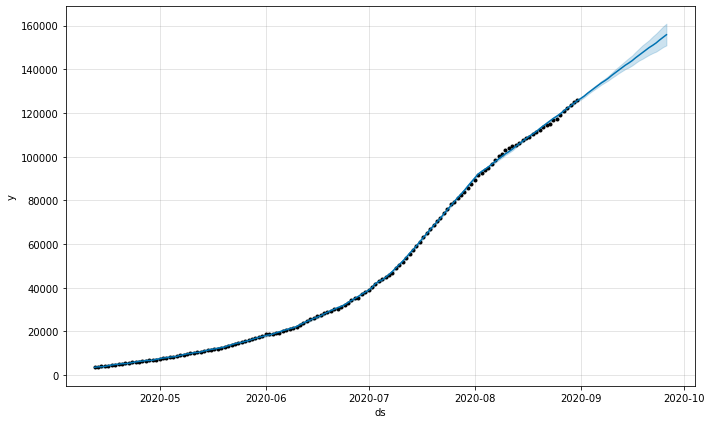

In [ ]:
fig = m.plot(forecast)

try add regressor with positive rate

try value after log, not good

In [ ]:
data0=data[data[:,0] == 0]
data0t=data0[:] #confirm
data0t = np.delete(data0, [3,4,5,6,7,8,9,10,11,12], 1)
data0t=np.delete(data0t,0,1)
date=np.delete(data0t,1,1) #date
date=date[0:142]
k=np.delete(data0t,0,1) #case
k=k.astype(np.float)
data0l=np.log(k)#log of number of cases
print(data0l) #note: this is data0L
dataset = pd.DataFrame({'ds': date[:, 0], 'y': data0l[:,0]}, index=range(142))
dataset.head()

[[ 8.17835817]
 [ 8.22523532]
 [ 8.28223006]
 [ 8.31262603]
 [ 8.37678104]
 [ 8.42748728]
 [ 8.45786773]
 [ 8.4945385 ]
 [ 8.53286967]
 [ 8.57866451]
 [ 8.62927109]
 [ 8.67111527]
 [ 8.70383872]
 [ 8.70383872]
 [ 8.76732915]
 [ 8.78553953]
 [ 8.81729778]
 [ 8.84101431]
 [ 8.86615849]
 [ 8.89480737]
 [ 8.93734985]
 [ 8.9730979 ]
 [ 9.00109973]
 [ 9.04038207]
 [ 9.07004329]
 [ 9.11007795]
 [ 9.14686795]
 [ 9.17657674]
 [ 9.19917831]
 [ 9.22660734]
 [ 9.25569607]
 [ 9.27799902]
 [ 9.31479047]
 [ 9.3389974 ]
 [ 9.36511943]
 [ 9.37339416]
 [ 9.39980304]
 [ 9.42351439]
 [ 9.47669666]
 [ 9.49461665]
 [ 9.52295893]
 [ 9.55513502]
 [ 9.58038553]
 [ 9.61487171]
 [ 9.6582262 ]
 [ 9.682342  ]
 [ 9.71293219]
 [ 9.74279049]
 [ 9.76186638]
 [ 9.79545681]
 [ 9.83252846]
 [ 9.839802  ]
 [ 9.84432124]
 [ 9.85597657]
 [ 9.87235802]
 [ 9.90563524]
 [ 9.92818017]
 [ 9.9486999 ]
 [ 9.97217371]
 [ 9.99829761]
 [10.03648755]
 [10.07365218]
 [10.11054237]
 [10.1509334 ]
 [10.17625901]
 [10.20032756]
 [10.21508

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.



ds         y
0  04-12-2020  8.178358
1  04-13-2020  8.225235
2  04-14-2020  8.282230
3  04-15-2020  8.312626
4  04-16-2020  8.376781

In [ ]:
#m = Prophet(growth='logistic')
m = Prophet(growth='linear')
m.add_country_holidays('US')
m.fit(dataset)

In [ ]:
future = m.make_future_dataframe(periods=26)
#future['cap'] = 4000000
print(future.tail())
forecast = m.predict(future)
forecast[['ds', 'yhat']].tail()
forecast[['ds', 'yhat']].tail(26) #with us holiday 9/26:4902 vs7857 9/10:2067 vs 4782 9/1:556 vs150

In [ ]:
daynew=np.asarray(forecast[[ 'yhat']])[142:168] #index of pd dataset start from 0
predict=np.zeros(26)
for i in range(26):
  predict[i]=np.exp(daynew[i])
print(predict) #9/1 612 9/10:5905 9/26:16282

In [ ]:
fig = m.plot(forecast)

try, using daily new cases to predict, not good

In [ ]:
data0=data[data[:,0] == 0]
data0t=data0[:] #confirm
data0t = np.delete(data0, [3,4,5,6,7,8,9,10,11,12], 1)
data0t=np.delete(data0t,0,1)
date=np.delete(data0t,1,1) #date
date=date[1:142]
k=np.delete(data0t,0,1) #case
k=k.astype(np.float)
data0n=k[1:142]-k[0:141]#number of new case
#data0n=np.zeros([2,141])
#data0n[0,:]=(data0t.T)[0,1:142]
#f=data0t[1:142]
print(data0n)
'''
k=(data0t[1:142][1]).astype(np.float)
print(k)
data0n=data0t[1:142][1]-data0t[0:141][1]
#data0t=np.delete(data0t,[210,211,212,213,214,215,216],0)
#print(data0t[0:10])
#print(data0t.shape)#(142, 2)
#cap=np.zeros(142)
#cap.fill(4000000)'''
#dataset = pd.DataFrame({'ds': data0t[:, 0], 'y': data0t[:, 1],'cap':cap})
'''
dataset = pd.DataFrame({'ds': date[:], 'y': data0n})
dataset.head()'''
#dataset.tail()

In [ ]:
print(data0n.shape)
print(date.shape)
#data0n.astype(int)
#data0n.astype(str)
#print(np.array(map(str,data0n)))

In [ ]:
dataset = pd.DataFrame({'ds': date[:, 0], 'y': data0n[:,0]}, index=range(141))
dataset.head()

In [ ]:
#m = Prophet(growth='logistic')
m = Prophet(growth='linear')
m.add_country_holidays('US')
m.fit(dataset)

In [ ]:
future = m.make_future_dataframe(periods=26)
#future['cap'] = 4000000
print(future.tail())
forecast = m.predict(future)
forecast[['ds', 'yhat']].tail()
forecast[['ds', 'yhat']].tail(26) #with us holiday 9/26:4902vs7857 9/10:2067 vs 4782 9/1:556 vs150

In [ ]:
last=k[141]
daynew=np.asarray(forecast[[ 'yhat']])[141:167]
predict=np.zeros(26)
for i in range(26):
  if i ==0 :
    predict[0]=last+daynew[i]
  else:
    predict[i]=predict[i-1]+daynew[i]
print(predict) #9/1 216 9/10:6438 9/26:16868

In [ ]:
help(Prophet)

Help on class Prophet in module fbprophet.forecaster:

class Prophet(builtins.object)
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniformly from
 |      the first `changepoint_range` proportion of the history.
 |  changepoint_range: Proportion of history in which trend changepoints will
 |      be estimated. Defaults to 0.8 for the first 80%. Not used if
 |      `changepoints` is specified.
 |  yearly_seasonality: Fit yearly seasonality.
 |      Can be 'auto', True, False, or a number of Fourier terms to generate.
 |  w